
📈 Processing AAPL...
------------------------------------------------------------


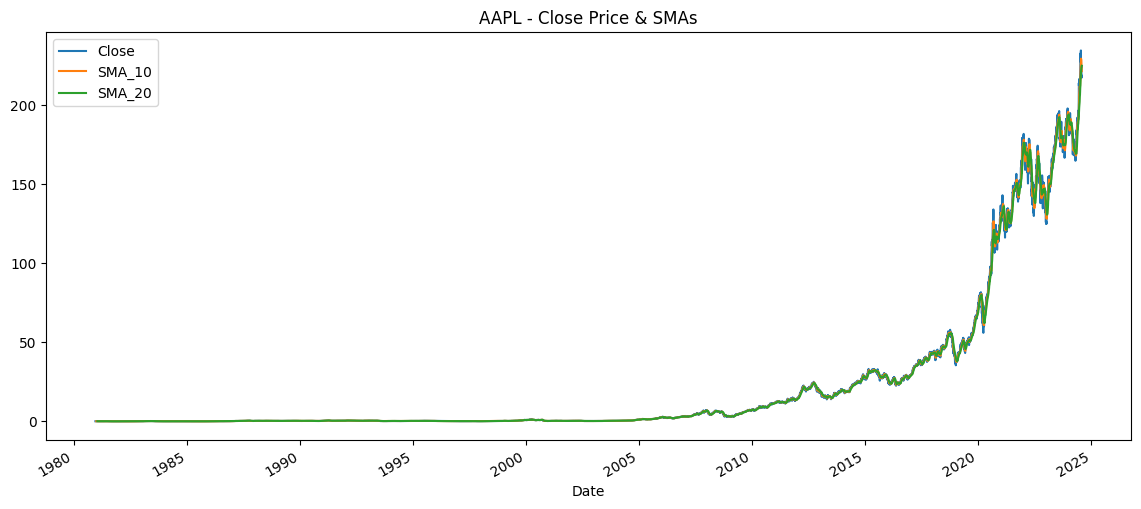

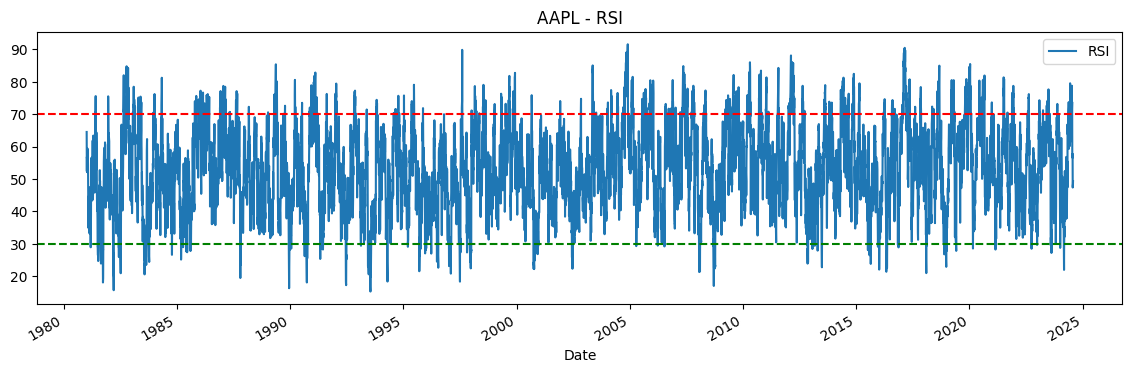

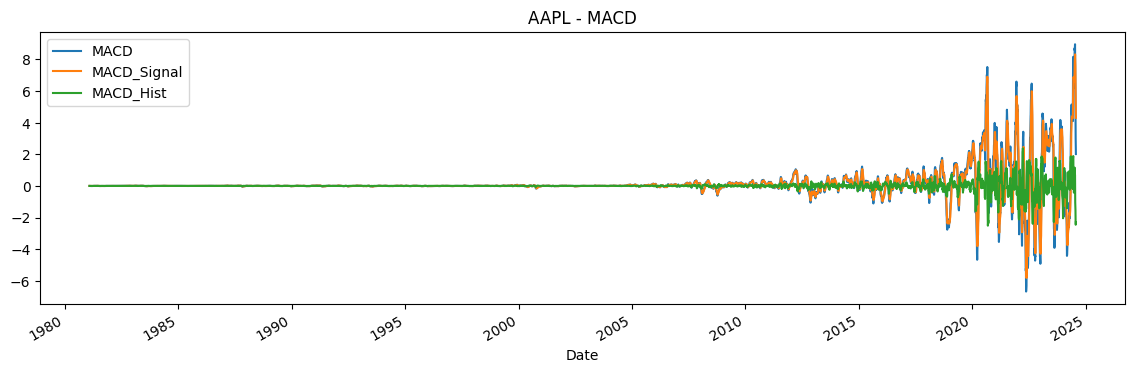


📈 Processing AMZN...
------------------------------------------------------------


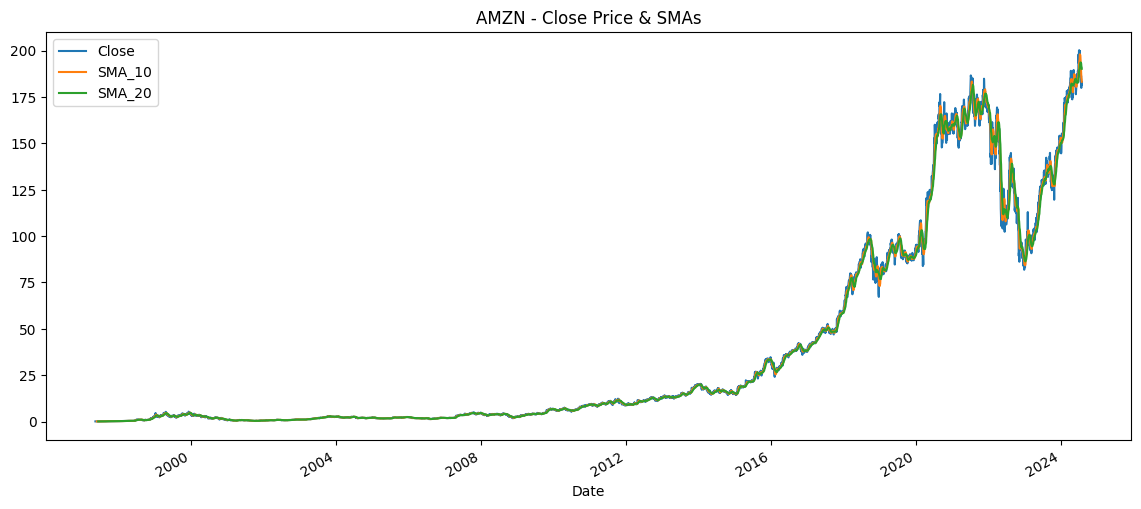

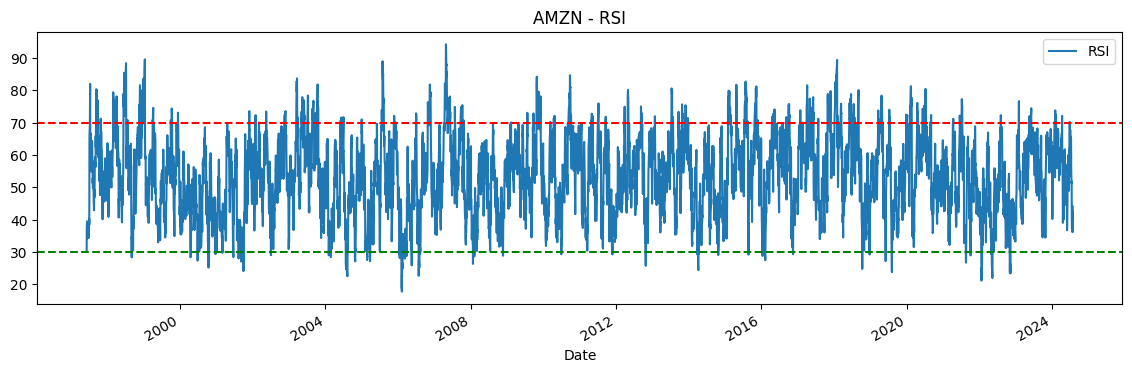

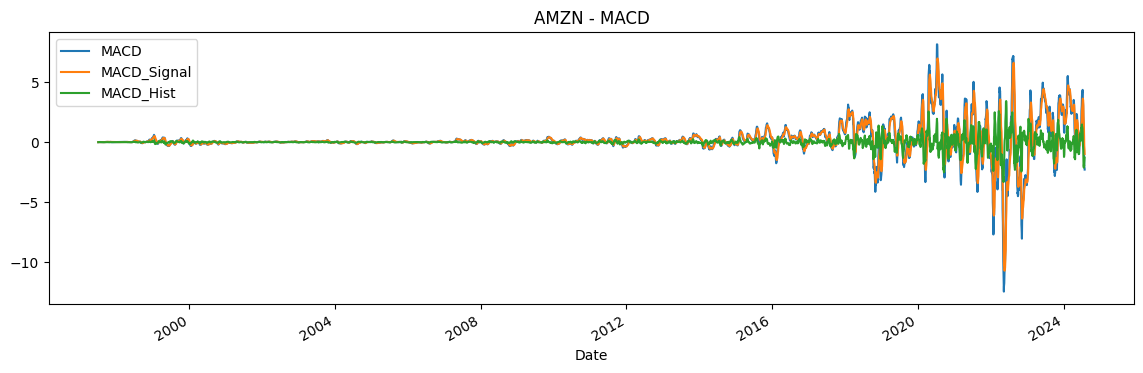


📈 Processing GOOG...
------------------------------------------------------------


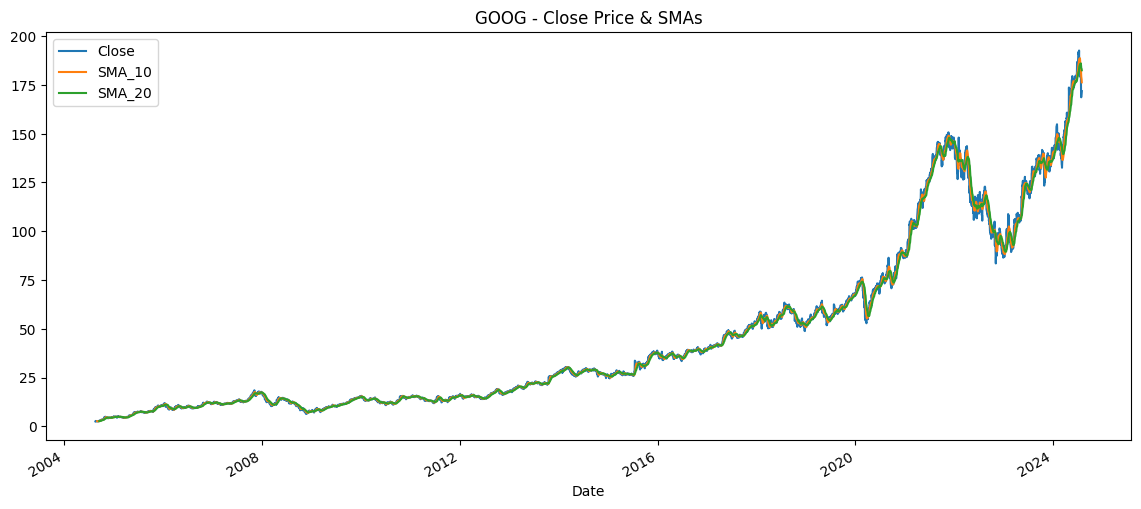

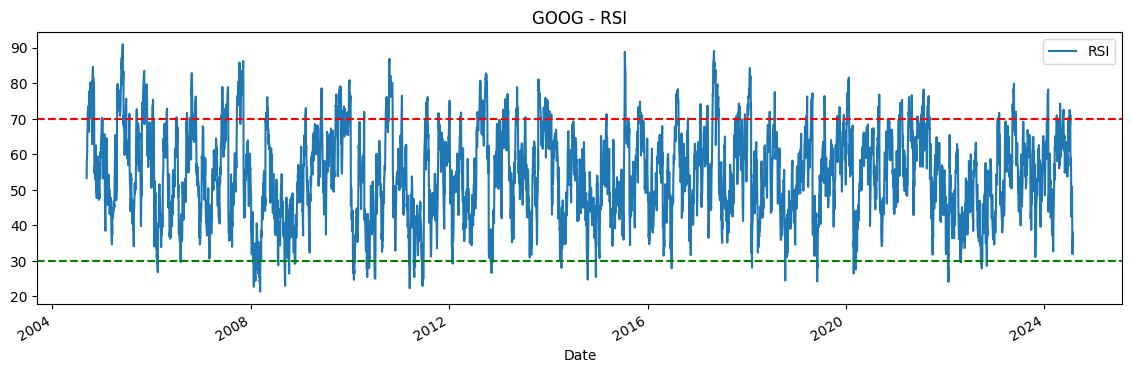

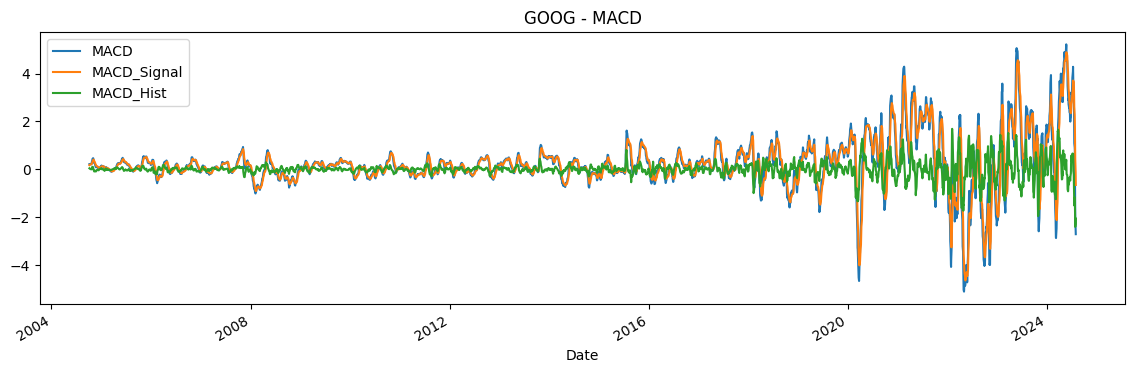


📈 Processing META...
------------------------------------------------------------


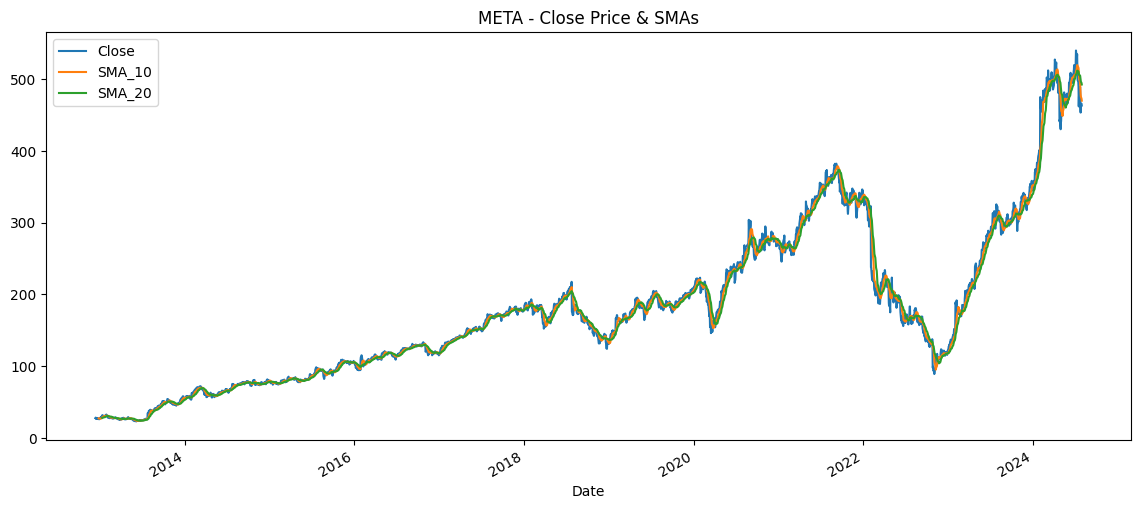

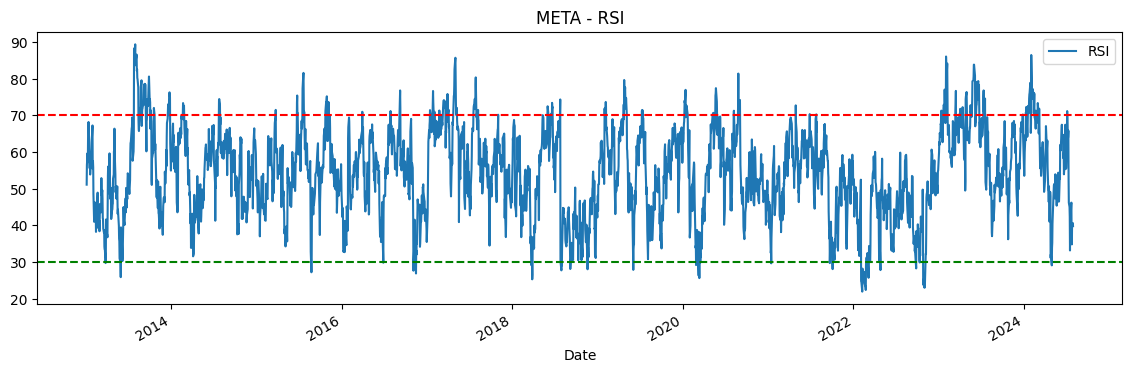

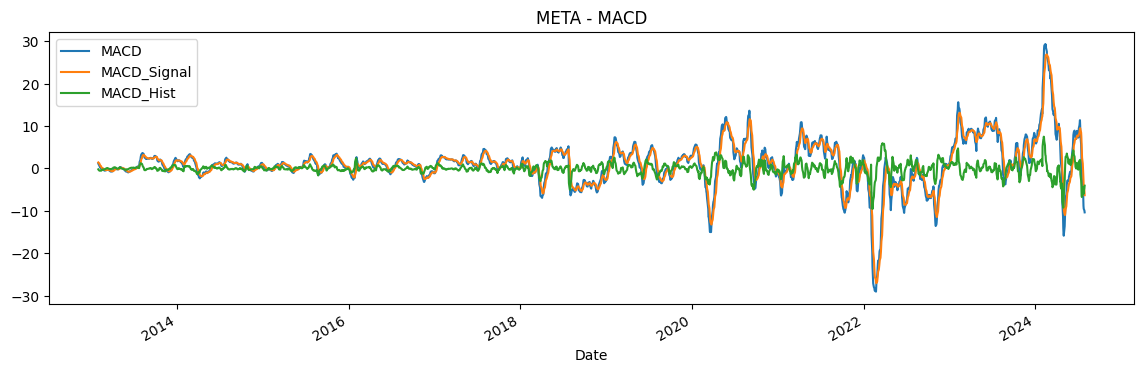


📈 Processing MSFT...
------------------------------------------------------------


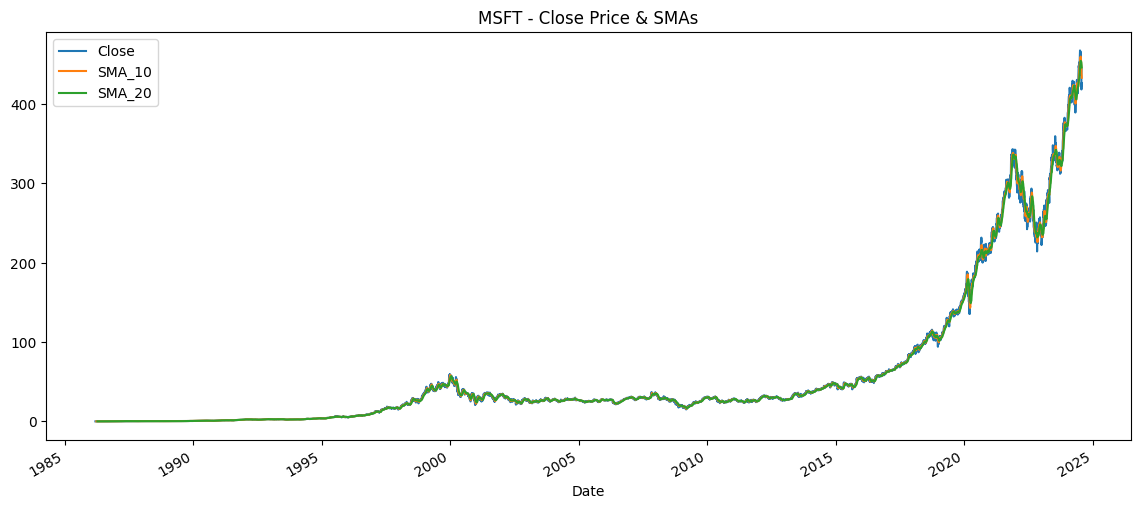

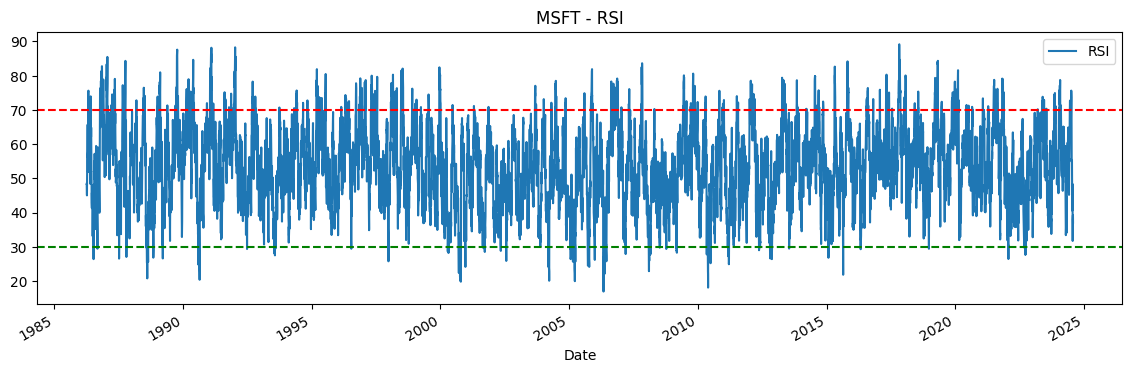

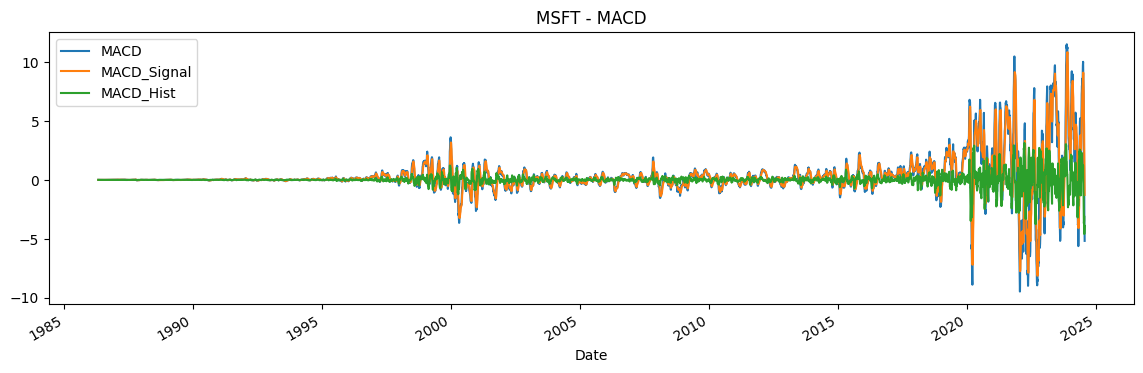


📈 Processing NVDA...
------------------------------------------------------------


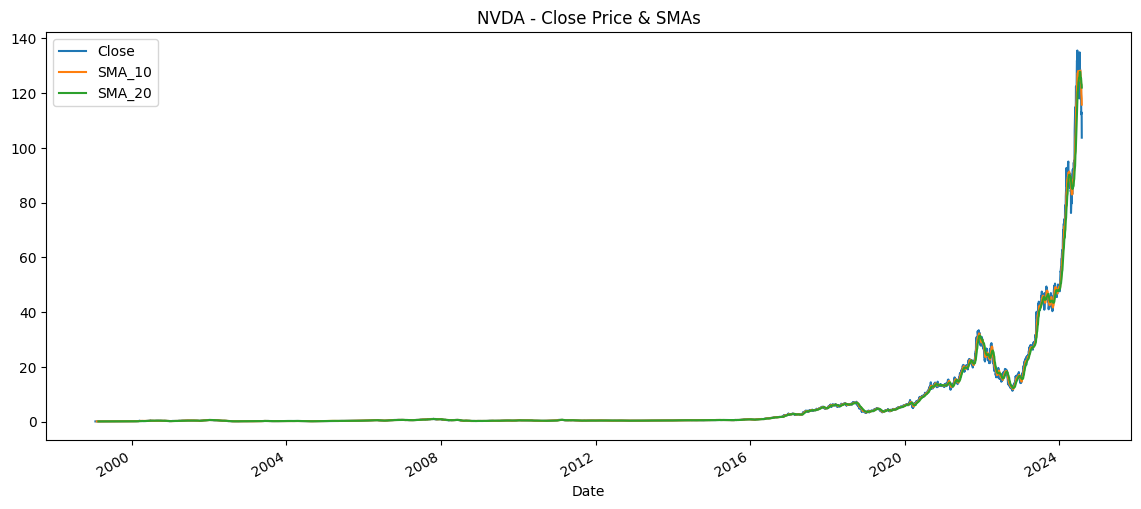

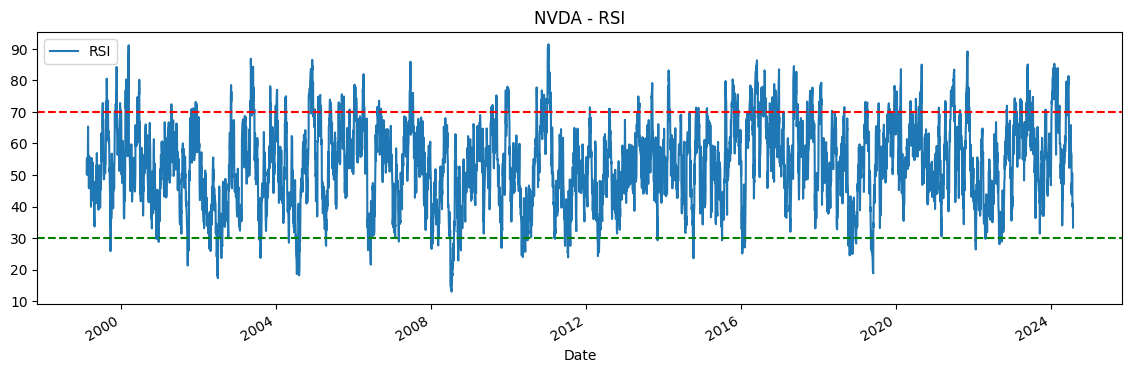

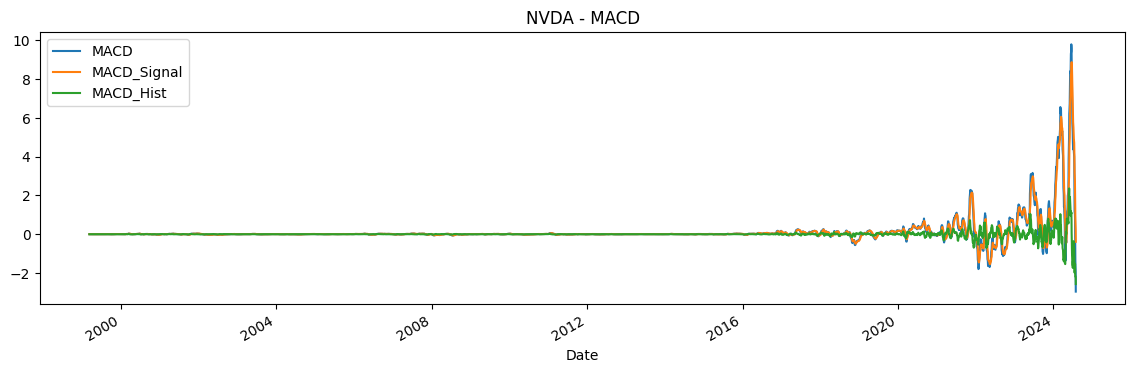


📈 Processing TSLA...
------------------------------------------------------------


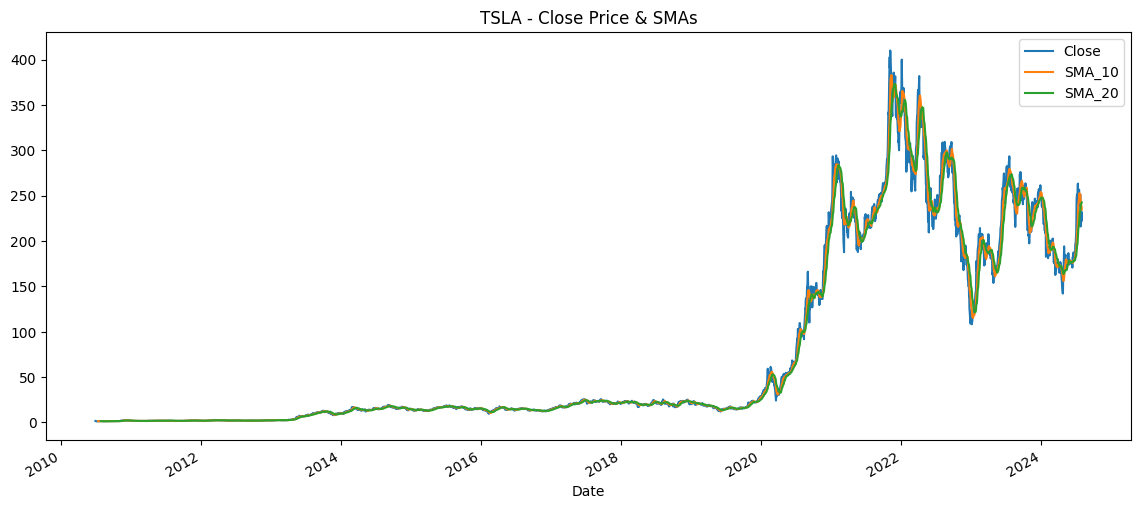

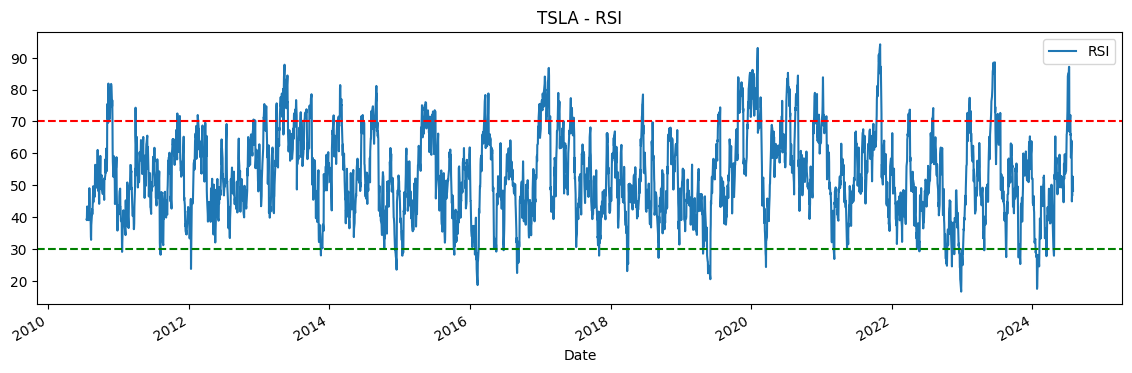

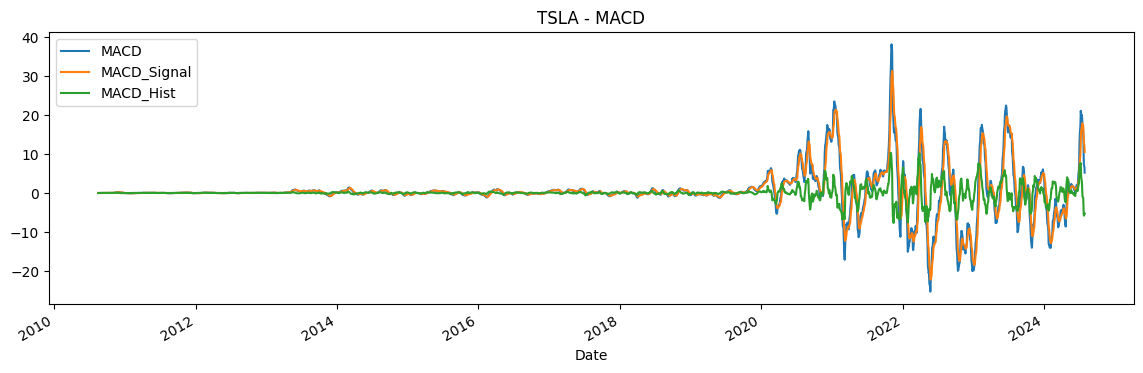

In [5]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import importlib
sys.path.append(os.path.abspath(".."))
import src.stock_data_cleaner
importlib.reload(src.stock_data_cleaner)
import src.technical_indicators
importlib.reload(src.technical_indicators)
from src.stock_data_cleaner import StockDataCleaner

from src.technical_indicators import TechnicalIndicators

#cleaner = StockDataCleaner("../data/yfinance_data")
#cleaner.observe_data()  # To observe
folder_path = "../data/yfinance_data/"  # Update if needed

for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        ticker = file.split('_')[0]
        print(f"\n📈 Processing {ticker}...\n" + "-"*60)

        df = pd.read_csv(os.path.join(folder_path, file))
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        # Ensure minimum length for indicators
        if df.shape[0] < 30:
            print(f"⚠️ Skipping {ticker}, not enough data for indicators.")
            continue

        ti = TechnicalIndicators(df)
        df = ti.add_all_indicators()

        # Plot Moving Averages
        df[['Close', 'SMA_10', 'SMA_20']].plot(figsize=(14,6), title=f'{ticker} - Close Price & SMAs')
        plt.show()

        # Plot RSI
        df[['RSI']].plot(figsize=(14,4), title=f'{ticker} - RSI')
        plt.axhline(70, color='red', linestyle='--')
        plt.axhline(30, color='green', linestyle='--')
        plt.show()

        # Plot MACD
        df[['MACD', 'MACD_Signal', 'MACD_Hist']].plot(figsize=(14,4), title=f'{ticker} - MACD')
        plt.show()

